In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# importing libralies

import pandas as pd
import matplotlib.pyplot as plt #for plots
import seaborn as sns #used for graphs
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler #removes the mean and scales it to unit variance
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  
#to display plots
from sklearn.model_selection import train_test_split, cross_val_score #split the dataset into random training and test datasets
#used for evaluation. Prints the output at each fold
from sklearn.metrics import mean_squared_error #average of square errors
from sklearn.impute import SimpleImputer #replace the missing values with statistical values
from sklearn.pipeline import Pipeline #string together different python functions for data processing
from sklearn.preprocessing import OneHotEncoder #categorical data is converted to numerical data
from sklearn.compose import ColumnTransformer #columns transformed seperately and then merged together
from sklearn.ensemble import GradientBoostingRegressor #used for regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 

The df_train dataframe reads the training data set which is in csv format and the same goes for df_test for testing data.

In [3]:
# Reading the files

df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')


In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


By performing the info() function, we can know the columns along with their corresponding data types and can also find whether they have any null values or not

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
X_lre = df_train.select_dtypes(exclude='object').copy()

In [8]:
X_lre.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
X_lre.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [10]:

X_lre['LotFrontage']=X_lre['LotFrontage'].fillna(X_lre['LotFrontage'].mean())
X_lre['GarageYrBlt']=X_lre['GarageYrBlt'].fillna(X_lre['GarageYrBlt'].mean())
X_lre['MasVnrArea']=X_lre['MasVnrArea'].fillna(X_lre['MasVnrArea'].mean())

In [11]:
X_lre.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

Here, we are performing describe() operation to the train data set which returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

By doing this, we can notice that

1)The mean value is greater than the median value(which is represented by 50%) of each column.

2)We can also notice that there is notably large difference between 75% tile and max values of LotArea,...,PoolArea, MiscVal,SalePrice.

It suggests that there are extreme values - outliers in our data set.

In [12]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Here, the Street is a dependant variable. We try to print all the forms of Street names available in the data set using the unique() function.

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [14]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [15]:
Y_lre = df_test.select_dtypes(exclude='object').copy()

In [16]:
Y_lre.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [17]:
Y_lre.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [18]:

Y_lre['LotFrontage']=Y_lre['LotFrontage'].fillna(Y_lre['LotFrontage'].mean())
Y_lre['GarageYrBlt']=Y_lre['GarageYrBlt'].fillna(Y_lre['GarageYrBlt'].mean())
Y_lre['MasVnrArea']=Y_lre['MasVnrArea'].fillna(Y_lre['MasVnrArea'].mean())
Y_lre['BsmtFinSF1']=Y_lre['BsmtFinSF1'].fillna(Y_lre['BsmtFinSF1'].mean())
Y_lre['BsmtFinSF2']=Y_lre['BsmtFinSF2'].fillna(Y_lre['BsmtFinSF2'].mean())
Y_lre['BsmtUnfSF']=Y_lre['BsmtUnfSF'].fillna(Y_lre['BsmtUnfSF'].mean())
Y_lre['TotalBsmtSF']=Y_lre['TotalBsmtSF'].fillna(Y_lre['TotalBsmtSF'].mean())
Y_lre['BsmtFullBath']=Y_lre['BsmtFullBath'].fillna(Y_lre['BsmtFullBath'].mean())
Y_lre['BsmtHalfBath']=Y_lre['BsmtHalfBath'].fillna(Y_lre['BsmtHalfBath'].mean())
Y_lre['GarageCars']=Y_lre['GarageCars'].fillna(Y_lre['GarageCars'].mean())
Y_lre['GarageArea']=Y_lre['GarageArea'].fillna(Y_lre['GarageArea'].mean())




In [19]:
Y_lre.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [20]:
Y_lre.isnull().sum().sum()

0

In [21]:
df_train.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

The value_counts() function displays the objects containing the unique values. The ouput is always printed in descending order. So that the first element is the most frequent occuring. Here, it shows that Pave has appeared a total of 1454 times in the training data set whereas Grvl has appeared 6 times.

In [22]:
df_train.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [23]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We distribute the SalePrice column dataset into a histogram where the data variable SalePrice is divided into discrete bins and the count of the number of observations is shown on the y-axis.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

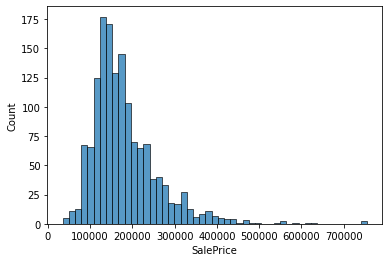

In [24]:
sns.histplot(df_train['SalePrice'])

Performing another visualization technique which comes under figure-level functions.The distplot() function shows the variation in the data distribution. The curve shows the frequent numbers based on density. 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

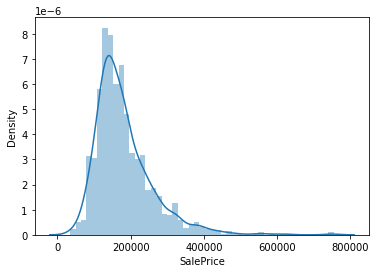

In [25]:
sns.distplot(df_train['SalePrice'])

Scatterplot can be used to identify the correlation between any two variables. Here we gave two dataset columns which are co-related and tried to draw an assumption as to how they are related and distributed. The two variables should always be plotted against the two axis. 


<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

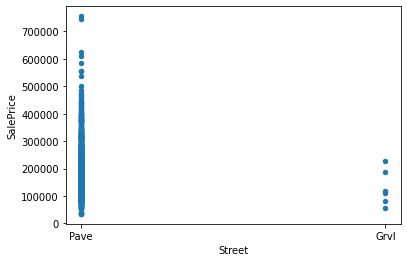

In [26]:
#Sale price vs Street

data = pd.concat([df_train['SalePrice'], df_train['Street']], axis=1)
data.plot.scatter(x='Street', y='SalePrice')


Instead, we can perform scatter plot on datasets like YearBuilt which contains many unique variables so it will be easier and flexible to use the scatterplot.

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

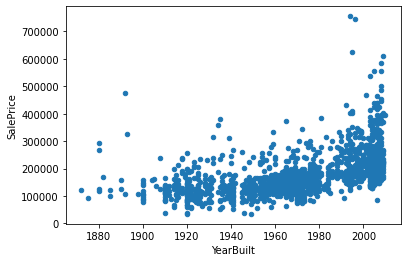

In [27]:
#Sale price vs YearBuilt

data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
data.plot.scatter(x='YearBuilt', y='SalePrice')

In box plot, the distribution of data is shown in a comparitative way which means that the data variables can be compared with each other easily without performing any operations. 

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

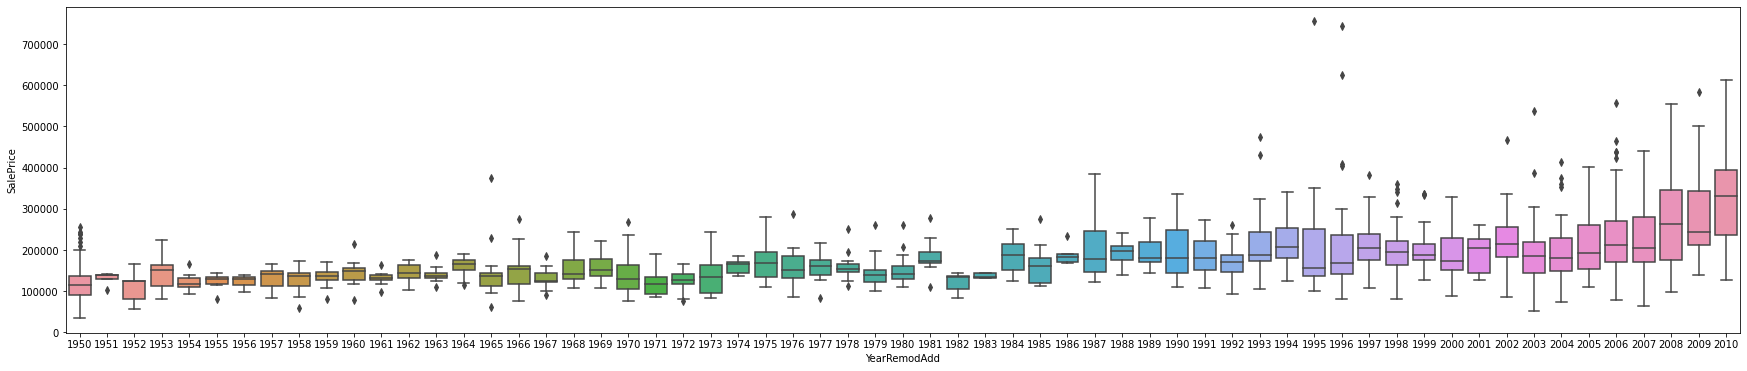

In [28]:
#sale price vs YearRemodAdd

data = pd.concat([df_train['SalePrice'], df_train['YearRemodAdd']], axis=1)
plt.figure(figsize=(30, 6))
sns.boxplot(x='YearRemodAdd', y="SalePrice", data=data)

The correlation matrix is helpful in determining how two datasets are related to each other. 
#Thresholds:
#0.2 = weak
#0.5 = medium
#0.8 = strong
#0.9 = very strong
The correlation value always lies between -1 and 1

<AxesSubplot:>

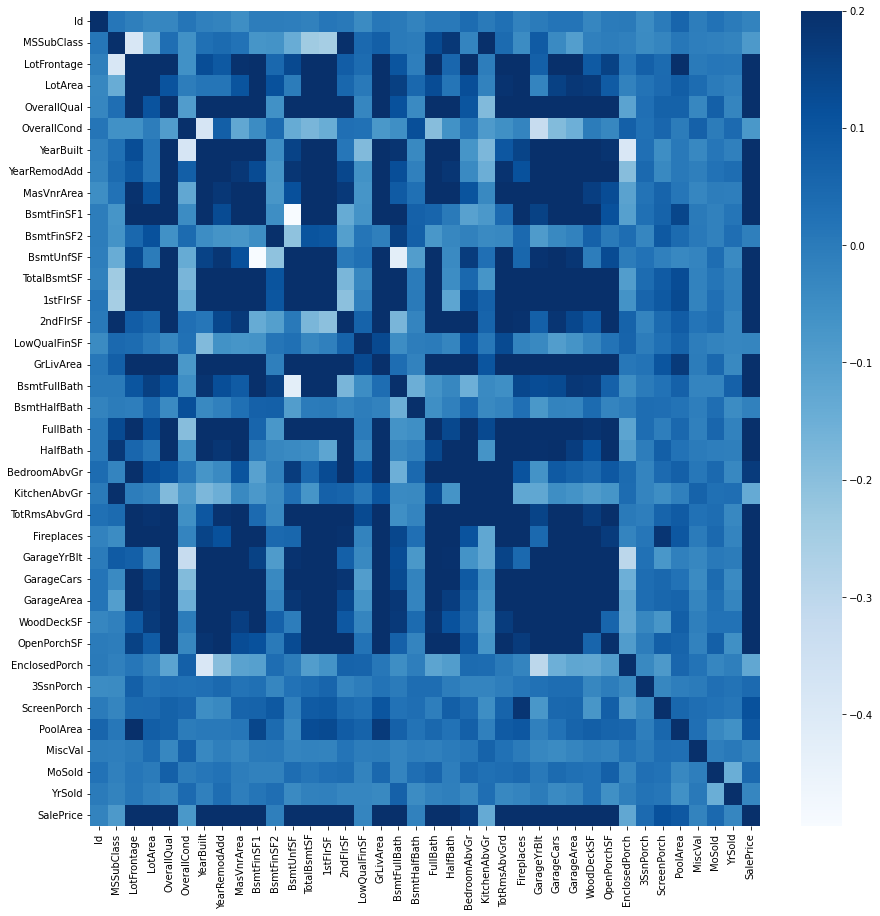

In [29]:
#correlation matrix

corrmat = df_train.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corrmat, cmap= "Blues", vmax=.2)

In [30]:
X_lre.isnull().sum().sum()

0

Here we perform linear regression where we sumarize and study relationship between two continous variables.

The root mean squared error tells us how concentrated the data is around the line of best fit. 
The closer the RMSE value to zero the better the regression model.

In [31]:
from sklearn.metrics import r2_score

X_slr = X_lre.drop('SalePrice', axis=1) #choosen features
y = X_lre['SalePrice'] #target variable
train_x, valid_x, train_y, valid_y = train_test_split(X_slr, y, train_size = 0.7, random_state = 0)
 
#train_x - 70% of data choosen features
#tarin_y - train_x target variables
#valid_x - 30% of training data which we will use for testing purposes
#valid_y - 30% target variables
simple_linear = LinearRegression()
simple_linear.fit(train_x, train_y) #fitting train and target variables into model

prediction = simple_linear.predict(valid_x) #valid_x - just testing data with our target variable
prediction3 = simple_linear.predict(Y_lre)
print(prediction3)

rmse_simple = mean_squared_error(prediction, valid_y, squared = False)
rmse_simple_sq = r2_score(prediction,valid_y)
print('Variance:', rmse_simple_sq)
print('RMSE Simple Linear Regression: ', round(rmse_simple, 2))


[129851.62626644 164278.0860911  179409.43076183 ... 187728.62972893
 105983.82733627 248889.91737315]
Variance: 0.6983829975862521
RMSE Simple Linear Regression:  43631.83


In [32]:
output_file = pd.DataFrame({'Id':Y_lre['Id'],'SalePrice':prediction3})
print(output_file)
output_file.to_csv('linearreg.csv',index = False)

        Id      SalePrice
0     1461  129851.626266
1     1462  164278.086091
2     1463  179409.430762
3     1464  201797.638179
4     1465  190934.086401
...    ...            ...
1454  2915   57875.925365
1455  2916   65810.566746
1456  2917  187728.629729
1457  2918  105983.827336
1458  2919  248889.917373

[1459 rows x 2 columns]


It tells the relationship between one quantitative dependant variable and two or more independent variables.


In [33]:

multiple_linear = LinearRegression()
multiple_linear.fit(train_x, train_y)
prediction1 = multiple_linear.predict(valid_x)

rmse_multiple = mean_squared_error(prediction1, valid_y, squared = False)
rmse_multiple_sq = r2_score(prediction1,valid_y)
print('Variance: ',rmse_multiple_sq)
print('RMSE Multiple Linear Regression: ', round(rmse_multiple, 2))

Variance:  0.6983829975862521
RMSE Multiple Linear Regression:  43631.83


The decision tree regressor classifies the data using true or false.

In [34]:

model = DecisionTreeRegressor(max_leaf_nodes = 5, random_state = 0)
model.fit(train_x, train_y)

preds_val = model.predict(valid_x)
prediction2 = model.predict(Y_lre)
print(prediction2)

rmse = mean_squared_error(valid_y, preds_val, squared = False)
rmse_decision_sq= r2_score(valid_y,preds_val)
print('Variance:' , rmse_decision_sq)
print('RMSE Decision Tree Regressor: ', round(rmse, 2))

[124500.58549223 124500.58549223 165696.81007752 ... 124500.58549223
 124500.58549223 209052.82959641]
Variance: 0.667849223260542
RMSE Decision Tree Regressor:  47443.76


In [35]:
output_file = pd.DataFrame({'Id':Y_lre['Id'],'SalePrice':prediction2})
print(output_file)
output_file.to_csv('decisiontree8.csv',index = False)

        Id      SalePrice
0     1461  124500.585492
1     1462  124500.585492
2     1463  165696.810078
3     1464  165696.810078
4     1465  278482.266667
...    ...            ...
1454  2915  124500.585492
1455  2916  124500.585492
1456  2917  124500.585492
1457  2918  124500.585492
1458  2919  209052.829596

[1459 rows x 2 columns]


In [36]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(train_x, train_y)
preds_val = model.predict(valid_x)

rmse = mean_squared_error(valid_y, preds_val, squared = False)
rmse_forest_sq= r2_score(valid_y,preds_val)
print('Variance: ' , rmse_forest_sq)
print('RMSE Random Forest Regressor: ' ,  round(rmse, 2))

Variance:  0.8518927595724797
RMSE Random Forest Regressor:  31681.05


relies on intuition that best possible model when combined with previous models, minimizes the prediction error.

In [37]:
my_model_3 = XGBRegressor(n_estimators=350, learning_rate=0.05)

# Fit the model
my_model_3.fit(train_x,train_y)              
predictions_3 = my_model_3.predict(valid_x)

# Calculate RMSE
rmse_xg = mean_squared_error(predictions_3, valid_y, squared = False)
rmse_xg_sq = r2_score(predictions_3, valid_y)
print('Variance: ' , rmse_xg_sq)
print("RMSE for XGBoost:" , round(rmse_xg, 2))

Variance:  0.7935787271063934
RMSE for XGBoost: 33868.62


Out of all the machine learning models, Decision Tree Regressor performs the best and gives least RMSE where Random Forest Regressor performs the worst with maximum RMSE.

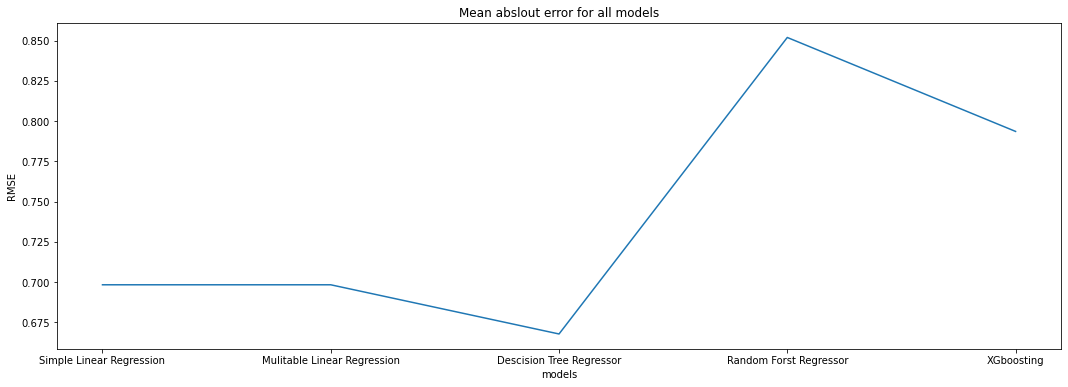

In [38]:
rmse = {'Simple Linear Regression':rmse_simple_sq,
       'Mulitable Linear Regression':rmse_multiple_sq,
      'Descision Tree Regressor': rmse_decision_sq,
      'Random Forst Regressor': rmse_forest_sq,
      'XGboosting':rmse_xg_sq}

plt.figure(figsize=(18,6))
sns.lineplot(x=rmse.keys(),y=rmse.values())
plt.title('Mean abslout error for all models')
plt.xlabel('models')
plt.ylabel('RMSE')
plt.show()

We can later use FeatureSelection method and Hyper Parameter Tuning to improve the models
*  Feature Selection is used in reducing the input variables to the model by using only relevant data and getting rid of noise in data.
* Hyper Paramater Tuning is used to find the best combination of parameters to maximize the model performance.